In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
from spacy.symbols import nsubj
from src.data.preprocess.exploratory_data_analysis_helpers import compare
from src.data.preprocess.exploratory_data_analysis_helpers import contains_bigram
from src.data.preprocess.exploratory_data_analysis_helpers import count_pejorative_bigrams
from src.data.preprocess.exploratory_data_analysis_helpers import find_most_common_nouns
from src.data.preprocess.exploratory_data_analysis_helpers import generate_ngrams
from src.data.preprocess.exploratory_data_analysis_helpers import part_of_speech_frequency
from src.data.preprocess.exploratory_data_analysis_helpers import verb_noun_syntactic_relation
from src.data.preprocess.exploratory_data_analysis_helpers import syntactic_dependency_frequency
from src.data.preprocess.exploratory_data_analysis_helpers import verb_noun_word_vectors
from src.utils.misc import create_spacy_docs
from src.utils.preprocess_text_helpers import remove_stopwords
from src.visualization.visualize_exploratory_data_analysis import plot_word_vectors

data = pd.read_csv("../../data/external/hatespeech/clean_sexism_dataset.csv")
fig_path="../../reports/hatespeech/figures/"

nlp = spacy.load("en_core_web_md")


In [2]:
data['docs'] = create_spacy_docs(data, "text")
misogynistic_docs = data.loc[data.loc[:,'label'] == 1, "docs"]
non_misogynistic_docs = data.loc[data.loc[:,'label'] == 0, "docs"]

number_of_words_in_misogynistic = sum([len(doc) for doc  in misogynistic_docs])
number_of_words_in_non_misogynistic = sum([len(doc) for doc  in non_misogynistic_docs])

In [3]:
data['stopwords'] = data['text'].apply(remove_stopwords)
data['stopwords_docs'] = create_spacy_docs(data, "stopwords")

stop_misogynistic_docs = data.loc[data.loc[:,'label'] == 1, "stopwords_docs"]
stop_non_misogynistic_docs = data.loc[data.loc[:,'label'] == 0, "stopwords_docs"]

number_of_words_in_misogynistic_stop = sum([len(doc) for doc  in stop_misogynistic_docs])
number_of_words_in_non_misogynistic_stop = sum([len(doc) for doc  in stop_non_misogynistic_docs])

misogynistic_common_nouns = pd.DataFrame(find_most_common_nouns(stop_misogynistic_docs), columns=['noun', 'count'])
non_misogynistic_common_nouns = pd.DataFrame(find_most_common_nouns(stop_non_misogynistic_docs), columns=['noun', 'count'])

misogynistic_common_nouns['count'] = misogynistic_common_nouns['count']/number_of_words_in_misogynistic_stop
non_misogynistic_common_nouns['count'] = non_misogynistic_common_nouns['count']/number_of_words_in_non_misogynistic_stop

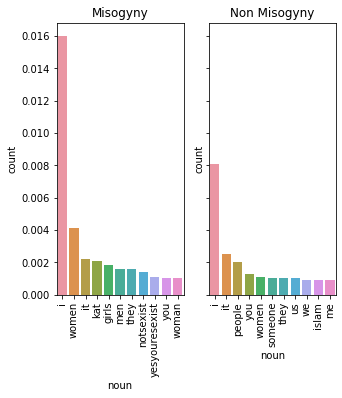

In [4]:
top_10_misogynistic = misogynistic_common_nouns.loc[0:10, :]
top_10_non_misogynistic = non_misogynistic_common_nouns.loc[0:10, :]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,5))
misogynistic = sns.barplot(x=top_10_misogynistic['noun'], y=top_10_misogynistic['count'], ax=ax[0])
non_misogynistic = sns.barplot(x=top_10_non_misogynistic['noun'], y=top_10_non_misogynistic['count'], ax=ax[1])
ax[0].set_title("Misogyny")
ax[1].set_title("Non Misogyny")

def rotate_ticks(graph1, graph2):
    for item1, item2 in zip(graph1.get_xticklabels(), graph2.get_xticklabels()):
        item1.set_rotation(90)
        item2.set_rotation(90)

rotate_ticks(misogynistic,non_misogynistic)

plt.savefig(fig_path+"top_10_common_nouns_total_corpus.png")
plt.show()


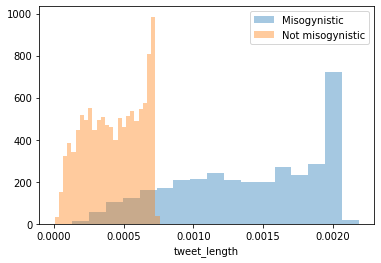

In [5]:
data['tweet_length'] = data["text"].apply(lambda tweet: len(tweet))
data.groupby('label').mean()['tweet_length']

sns.distplot(data.loc[data.loc[:,'label'] == 1, "tweet_length"]/number_of_words_in_misogynistic, kde=False, label="Misogynistic")
sns.distplot(data.loc[data.loc[:,'label'] == 0, "tweet_length"]/number_of_words_in_non_misogynistic, kde=False, label="Not misogynistic")

plt.savefig(fig_path+"tweet_length_total_corpus.png")

plt.legend();

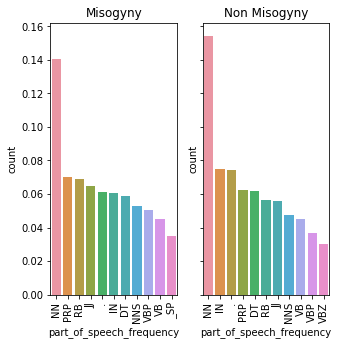

In [6]:
top_10_misogynistic_pos, top_10_non_misogynistic_pos = compare(part_of_speech_frequency, misogynistic_docs, non_misogynistic_docs)
top_10_misogynistic_pos['count'] = top_10_misogynistic_pos['count']/number_of_words_in_misogynistic
top_10_non_misogynistic_pos['count'] = top_10_non_misogynistic_pos['count']/number_of_words_in_non_misogynistic

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,5))
misogynistic = sns.barplot(x=top_10_misogynistic_pos[part_of_speech_frequency.__name__], y=top_10_misogynistic_pos['count'], ax=ax[0])
non_misogynistic = sns.barplot(x=top_10_non_misogynistic_pos[part_of_speech_frequency.__name__], y=top_10_non_misogynistic_pos['count'], ax=ax[1])

ax[0].set_title("Misogyny")
ax[1].set_title("Non Misogyny")

rotate_ticks(misogynistic, non_misogynistic)    
plt.savefig(fig_path+"pos_frequency_total_corpus.png")
plt.show()

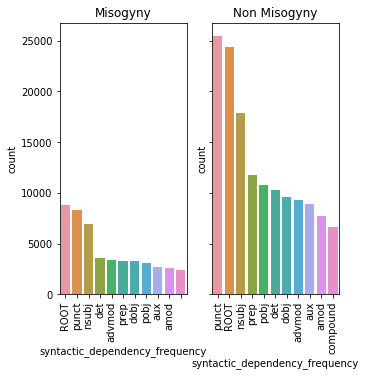

Verbs Men
Verbs Women


/home/tcake/coding_projects/python/opt_out/find-out/find-out/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


{'s,
 need,
 speak,
 hide,
 care,
 being,
 needed,
 been,
 give,
 are,
 stay,
 were,
 understand,
 is,
 are,
 offer,
 give,
 are,
 have,
 break,
 was,
 know,
 are,
 is,
 rips,
 are,
 be,
 are,
 feel,
 are,
 write,
 gets,
 driving,
 rap,
 disagree,
 face,
 have,
 ruled,
 let,
 be,
 marries,
 have,
 be,
 make,
 had,
 do,
 being,
 drive,
 being,
 have,
 are,
 died,
 need,
 have,
 fighting,
 are,
 have,
 said,
 lack,
 joke,
 are,
 argue,
 talk,
 have,
 seem,
 decide,
 do,
 shame,
 have,
 are,
 tend,
 paicipate,
 have,
 have,
 talk,
 wants,
 explains,
 have,
 drive,
 call,
 get,
 wear,
 take,
 stay,
 cook,
 are,
 be,
 living,
 is,
 familiarise,
 suck,
 have,
 having,
 know,
 ran,
 are,
 do,
 need,
 see,
 play,
 control,
 is,
 want,
 presents,
 proposing,
 look,
 prefer,
 make,
 exist,
 belong,
 be,
 help,
 have,
 drive,
 are,
 talks,
 are,
 taking,
 knowing,
 are,
 driving,
 play,
 play,
 being,
 paicipating,
 fall,
 internalized,
 assaulted,
 drive,
 did,
 have,
 fights,
 play,
 are,
 stan

In [7]:
top_10_misogynistic_dep, top_10_non_misogynistic_dep = compare(syntactic_dependency_frequency, misogynistic_docs, non_misogynistic_docs)

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,5))
misogynistic = sns.barplot(x=top_10_misogynistic_dep[syntactic_dependency_frequency.__name__], y=top_10_misogynistic_dep['count'], ax=ax[0])
non_misogynistic = sns.barplot(x=top_10_non_misogynistic_dep[syntactic_dependency_frequency.__name__], y=top_10_non_misogynistic_dep['count'], ax=ax[1])

ax[0].set_title("Misogyny")
ax[1].set_title("Non Misogyny")

rotate_ticks(misogynistic, non_misogynistic)  
plt.savefig(fig_path+"syntactic_frequency_total_corpus.png")   

plt.show()


nsubj_verbs = verb_noun_syntactic_relation(data['docs'], nsubj)  
df_nsubj = pd.DataFrame(nsubj_verbs, columns=["subject", "head_verb"])
print("Verbs Men")
set(df_nsubj[df_nsubj['subject'].str.contains(r"\b(man|men)\b")]['head_verb'].to_list())
print("Verbs Women")
set(df_nsubj[df_nsubj['subject'].str.contains(r"\b(woman|women)\b")]['head_verb'].to_list())

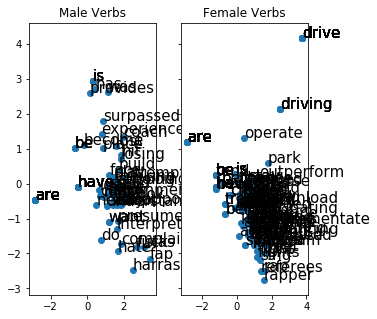

In [8]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,5))
nsubj_verbs, verbs, nouns = verb_noun_word_vectors(data['docs'], nsubj)
male_verb_index = [n for n, j in enumerate(nouns) if j[0] == "man" or  j[0] == "men" ]
ax[0] = plot_word_vectors(nsubj_verbs[male_verb_index, :], verbs[male_verb_index, :], ax[0])
ax[0].set_title("Male Verbs")

female_verb_index = [n for n, j in enumerate(nouns) if j[0] == "woman" or  j[0] == "women" ]
ax[1] = plot_word_vectors(nsubj_verbs[female_verb_index, :], verbs[female_verb_index, :], ax[1])
ax[1].set_title("Female Verbs")
plt.savefig(fig_path+"word_vectors_total_corpus.png")   

plt.show()

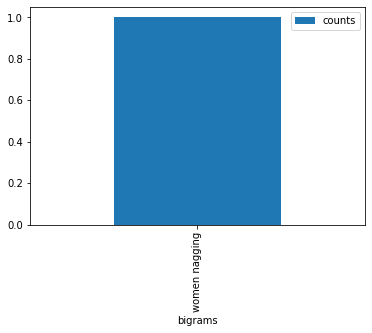

In [9]:
bigrams = data['text'].apply(lambda tweet: generate_ngrams(tweet, 2))
df_bigrams = pd.DataFrame(bigram for bigram in bigrams)
df_bigrams = df_bigrams.fillna("no bigram")

ADJECTIVE = ["battered", "untreated", "barren", "shrewish", "sheltered", "heartbroken", "unmarried", "undernourished", "underweight", "uncomplaining", "nagging"]
FEMALE = ["women", "woman"]

all_bigrams = []
for i in range(0, len(df_bigrams.columns)):
    all_bigrams.append(df_bigrams[i].apply(lambda bigram: contains_bigram(bigram, ADJECTIVE, FEMALE)))

counts = count_pejorative_bigrams(all_bigrams)
df_bigrams_counts = pd.DataFrame(counts, columns=["bigrams", "counts"]).groupby("bigrams").count().plot.bar()
plt.show()